In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv")

1. Summary Statistics

In [ ]:
numerical_cols = ['Balance', 'CreditScore', 'NumOfProducts']
summary_stats = df[numerical_cols].agg(['mean', 'median', 'std', 'skew', 'kurt'])
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
              Balance  CreditScore  NumOfProducts
mean    76485.889288   650.528800       1.530200
median  97198.540000   652.000000       1.000000
std     62397.405202    96.653299       0.581654
skew       -0.141109    -0.071607       0.745568
kurt       -1.489412    -0.425726       0.582981


2. Distribution of Customers


Gender Distribution:
 Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

Geography Distribution:
 Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


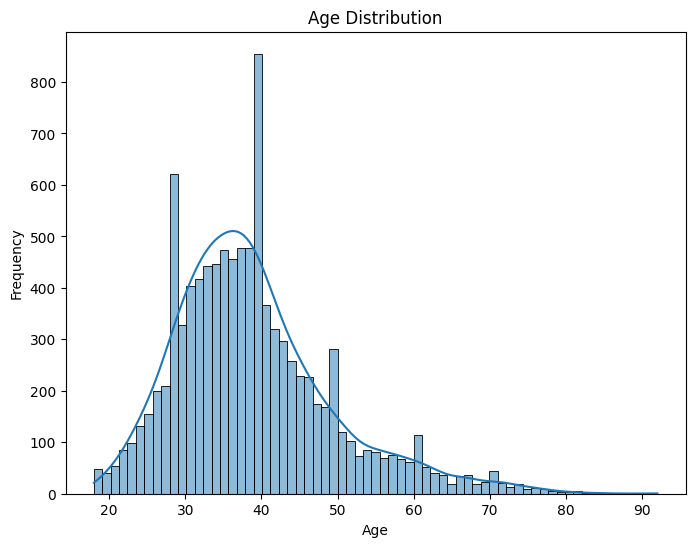


Age Group Distribution:
 AgeGroup
35-44    39.81
25-34    32.22
45-54    14.58
55-64     6.00
18-24     4.57
65+       2.82
<18       0.00
Name: proportion, dtype: float64


In [ ]:
# Gender
gender_distribution = df['Gender'].value_counts(normalize=True) * 100
print("\nGender Distribution:\n", gender_distribution)

# Geography
geography_distribution = df['Geography'].value_counts(normalize=True) * 100
print("\nGeography Distribution:\n", geography_distribution)

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = df['AgeGroup'].value_counts(normalize=True) * 100
print("\nAge Group Distribution:\n", age_group_distribution)

3. Transaction Counts (NumOfProducts) - Active vs. Inactive

In [ ]:
transaction_stats = df.groupby('IsActiveMember')['NumOfProducts'].agg(['min', 'max', 'mean'])
print("\nTransaction Counts (Active vs. Inactive):\n", transaction_stats)


Transaction Counts (Active vs. Inactive):
                 min  max      mean
IsActiveMember                    
0                 1    4  1.524438
1                 1    4  1.535624


 4. Relationships between Variables

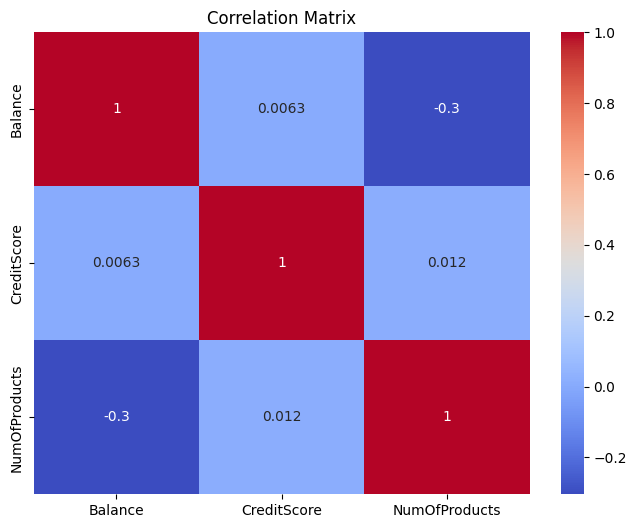

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

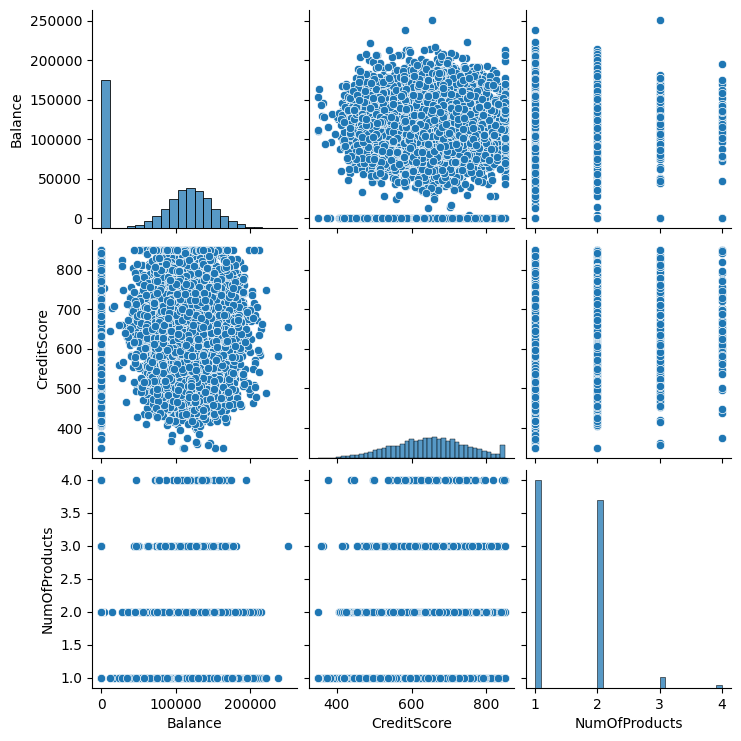

In [ ]:
sns.pairplot(df[numerical_cols])
plt.show()

5. Stayed vs. Churned Customers

In [ ]:
churn_stats = df.groupby('Exited')[numerical_cols].agg(['mean', 'median', 'std'])  # Add other stats as needed
print("\nStayed vs. Churned Customer Stats:\n", churn_stats)


Stayed vs. Churned Customer Stats:
              Balance                          CreditScore                     \
                mean     median           std        mean median         std   
Exited                                                                         
0       72742.750663   92063.06  62851.577108  651.837855  653.0   95.650047   
1       91109.476006  109344.23  58346.483197  645.414622  646.0  100.337351   

       NumOfProducts                   
                mean median       std  
Exited                                 
0           1.544210    2.0  0.509542  
1           1.475466    1.0  0.801408  


6. Probability of Low Credit Score and High Balance

In [ ]:
# Define "low" and "high" thresholds (customize as needed)
low_credit_threshold = 600
high_balance_threshold = 100000  # Example, adjust based on your data

# Calculate probability
low_credit = df['CreditScore'] < low_credit_threshold
high_balance = df['Balance'] > high_balance_threshold
joint_probability = (low_credit & high_balance).mean() * 100  # Percent
print("\nProbability of Low Credit & High Balance:\n", joint_probability, "%")


Probability of Low Credit & High Balance:
 14.52 %
